In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None

# Actividad1

crear un arreglo de 4 demensiones ordenados por la edad o nombre 

In [3]:
cabecera= [('nombre', 'S10'), ('edad', int)]
datos= [('Wendy', 22), ( 'mishelle', 19), ( 'Juan', 20), ( 'Diego', 15)]
usuarios = np.array(datos, dtype=cabecera)
np.sort(usuarios, order='edad')


array([(b'Diego', 15), (b'mishelle', 19), (b'Juan', 20), (b'Wendy', 22)],
      dtype=[('nombre', 'S10'), ('edad', '<i4')])

# Actividad2

con los datos de canciones. elija llas 3 columnas que usted desee y ordenelas ascendentemente

In [4]:
data= pd.read_csv('musica.csv')
data.head()

id                          name       artists  \
0  6DCZcSspjsKoFjzjrWoCd                    God's Plan       Santana   
1  3ee8Jmje8o58CHK66QrVC                          SAD!  XXXTENTACION   
2  0e7ipj03S05BNilyu5bRz    rockstar (feat. 21 Savage)   Post Malone   
3  3swc6WTsr7rl9DqQKQA55  Psycho (feat. Ty Dolla $ign)   Post Malone   
4  2G7V7zsVDxg1yRsu7Ew9R                In My Feelings         Drake   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.754   0.449  7.0    -9.211   1.0       0.1090        0.0332   
1         0.740   0.613  8.0    -4.880   1.0       0.1450        0.2580   
2         0.587   0.535  5.0    -6.090   0.0       0.0898        0.1170   
3         0.739   0.559  8.0    -8.011   1.0       0.1170        0.5800   
4         0.835   0.626  1.0    -5.833   1.0       0.1250        0.0589   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000083     0.552    0.357   77.169     198973.0             4.0  
1          0.003720     0.123    0.473   75.023     166606.0             4.0  
2          0.000066     0.131    0.140  159.847     218147.0             4.0  
3          0.000000     0.112    0.439  140.124     221440.0             4.0  
4          0.000060     0.396    0.350   91.030     217925.0             4.0

In [5]:
column_danceability= pd.DataFrame(np.array(data['danceability']))
column_danceability.sort_values([0])

0
98  0.258
93  0.284
80  0.351
49  0.489
11  0.511
..    ...
91  0.964
20    NaN
69    NaN
70    NaN
77    NaN

[100 rows x 1 columns]

In [7]:
column_mode= pd.DataFrame(np.array(data['mode']))
column_mode.sort_values([0])


0
48  0.0
85  0.0
28  0.0
59  0.0
31  0.0
..  ...
99  1.0
20  NaN
69  NaN
70  NaN
77  NaN

[100 rows x 1 columns]

In [8]:
column_energy= pd.DataFrame(np.array(data['energy']))
column_energy.sort_values([0])

0
80  0.296
84  0.299
38  0.308
91  0.346
52  0.375
..    ...
12  0.909
20    NaN
69    NaN
70    NaN
77    NaN

[100 rows x 1 columns]

# Actividad3

Con estos datos que ya tienes agrega una nueva columna para que puedas predecir, en esa columna
ahora vas a tener el país del programador. Ojo, recuerda que la regresión lineal simple solo trabaja
con datos continuos, así que cada país deberás represarlo con un número, por ejemplo Ecuador =
1, España = 2.

In [9]:
dataset_salarios = pd.read_csv('salarios.csv')
dataset_salarios.head()

Aexperiencia  Salario
0          10.0     1225
1           8.0     1032
2           5.4      801
3           2.5      711
4           1.0      702

In [10]:
dataset_salarios['pais']=np.random.randint(1, 7,dataset_salarios.shape[0])
for i in dataset_salarios.index:
    if dataset_salarios['Salario'][i] >= 700 and dataset_salarios['Salario'][i] < 750:
        dataset_salarios['pais'][i]=1
    elif dataset_salarios['Salario'][i] >= 750 and dataset_salarios['Salario'][i] < 800:
        dataset_salarios['pais'][i]=2
    elif dataset_salarios['Salario'][i] >= 800 and dataset_salarios['Salario'][i] < 850:
        dataset_salarios['pais'][i]=3
    elif dataset_salarios['Salario'][i] >= 850 and dataset_salarios['Salario'][i] < 900:
        dataset_salarios['pais'][i]=4
    else:
        dataset_salarios['pais'][i]= 5

dataset_salarios

Aexperiencia  Salario  pais
0           10.0     1225     5
1            8.0     1032     5
2            5.4      801     3
3            2.5      711     1
4            1.0      702     1
5            8.0     1052     5
6            4.0      763     2
7            6.0      901     5
8            2.0      702     1
9           10.0     1312     5
10           4.0      722     1
11           7.0      924     5
12           3.0      684     5
13           5.0      728     1
14           2.0      733     1
15           5.0      753     2
16           3.0      861     4
17           2.0      711     1
18           3.0      794     2
19           2.0      731     1
20           5.0      786     2
21           3.4      666     5
22           5.3      791     2
23           2.1      650     5
24           9.2     1111     5
25          10.0     1125     5
26           3.2      811     3
27          10.0     1222     5
28           4.0      801     3
29           1.0      521     5

In [14]:
x = dataset_salarios.iloc[:,2:3].values
y = dataset_salarios.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
x_train

array([[5],
       [5],
       [1],
       [2],
       [5],
       [4],
       [1],
       [1],
       [5],
       [2],
       [5],
       [5],
       [2],
       [1],
       [2],
       [1],
       [5],
       [5],
       [5],
       [1],
       [5],
       [5],
       [2],
       [5]])

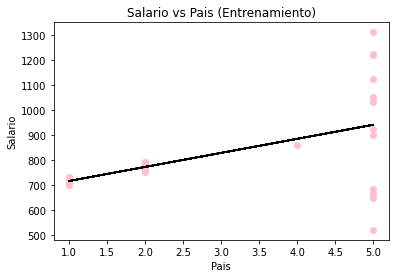

In [17]:
regresion = LinearRegression()
regresion.fit(x_train, y_train)
LinearRegression()
vision_train=plt
vision_train.scatter(x_train,y_train, color='pink')
vision_train.plot(x_train, regresion.predict(x_train),color = 'black')
vision_train.title('Salario vs Pais (Entrenamiento)')
vision_train.xlabel('Pais')
vision_train.ylabel('Salario')
vision_train.show()